# DEMO 6.3: **Đánh giá mô hình gom cụm**
<u>Nội dung</u>:
1. Phương pháp ELBOW
2. Sử dụng Silhouette scores

<u>Cập nhật</u>: **05/2023**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [2]:
## Môi trường lập trình
from google.colab import drive
drive.mount('/content/gdrive')
folder = '/content/gdrive/My Drive/Machine Learning/Ch06 - Danh gia giai phap'

Mounted at /content/gdrive


In [4]:
## Thư viện
import matplotlib.cm        as cm
import matplotlib.pyplot    as plt
import numpy                as np
import pandas               as pd
import warnings
warnings.filterwarnings('ignore')

from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans
from sklearn.metrics        import silhouette_samples, silhouette_score

---
## 1. **Phương pháp ELBOW**
---

In [5]:
## Tập tin dữ liệu Customers.csv
data = pd.read_csv(folder + '/Data/Customers.csv', usecols = ['income', 'age'])

## Chuyển income ($) --> $K
data.income = data.income // 1000
print(data.head())

   income  age
0     101   58
1      49   27
2      36   52
3      33   49
4      72   53


In [ ]:
## Tính toán Inertia theo các giá trị của tham số k
nbClusters = range(1, 13)
scores = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(data)
    scores.append(model.inertia_)

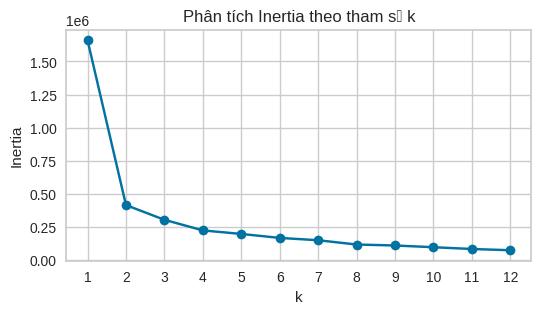

In [ ]:
##  Biểu diễn trực quan Inertia --> xác định elbow
plt.figure(figsize = (6, 3))
plt.plot(nbClusters, scores, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Inertia')
plt.title('Phân tích Inertia theo tham số k')

plt.show()

In [ ]:
##------------------------------------------------------------------------------
## Thực hiện clustering bằng phương pháp KMeans
##------------------------------------------------------------------------------
k     = 2 # chọn k =2 dựa trên biểu đồ phân tích inertia
model = KMeans(n_clusters = k)
model.fit(data)

KMeans(n_clusters=2)

In [ ]:
## Các trọng tâm
print(f'*** {k} trọng tâm:')
print(model.cluster_centers_)

*** 2 trọng tâm:
[[ 44.69108911  39.60594059]
 [115.28686869  39.21010101]]


In [ ]:
## Kết quả gom cụm khách hàng
data['cluster'] = model.labels_
print(data.head())

print('\nKích thước các clusters:')
print(data.groupby('cluster').age.count())
print(f'Inertia / #samples = {model.inertia_/data.shape[0]:.2f}')

   income  age  cluster
0     101   58        1
1      49   27        0
2      36   52        0
3      33   49        0
4      72   53        0

Kích thước các clusters:
cluster
0    504
1    496
Name: age, dtype: int64
Inertia / #samples = 414.71


---
## 2. **Sử dụng Silhouette scores**
---

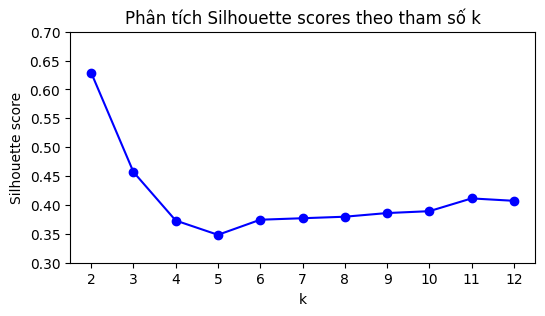

Giá trị tối ưu cho tham số: k = 2


In [ ]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 13) # Lưu ý: (k >= 2) vì cần tính khoảng cách từ xi đến nearest cluster
silhouettes = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(data)
    silhouettes.append(silhouette_score(data, model.fit_predict(data), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích Silhouette scores theo tham số k')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

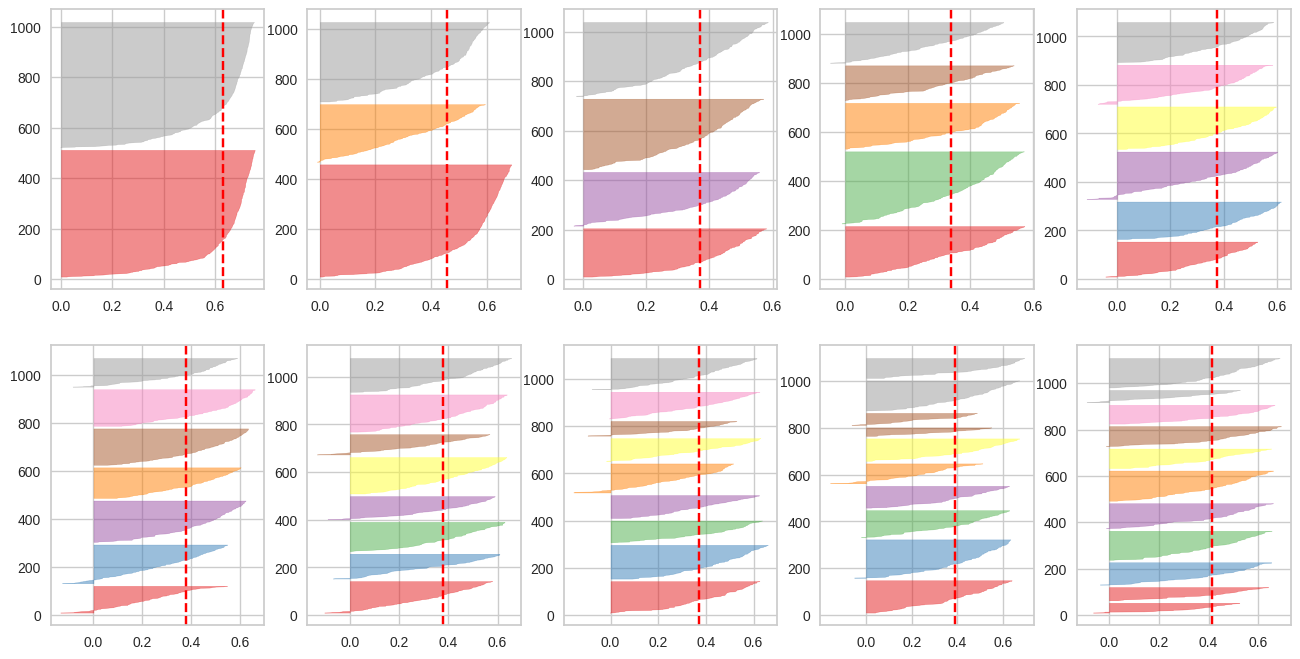

In [ ]:
## Biểu diễn trực quan Silhouette plot bằng thư viện YellowBrick
## https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
from yellowbrick.cluster import SilhouetteVisualizer

nbClusters = range(2, 12)
fig, ax = plt.subplots(2, 5, figsize = (16, 8)) # 2 rows, 5 cols

for k in nbClusters:
    model = KMeans(n_clusters = k)
    row, col = divmod(k - 2, 5) # tọa độ subplot

    visualizer = SilhouetteVisualizer(model, ax = ax[row][col])
    visualizer.fit(data)
## Vạch đứng đứt nét thể hiện Silouette trung bình
## Mỗi data point xi sẽ có score là vạch nằm ngang
## Những clusters có shape nhọn phía bên phải là không tốt

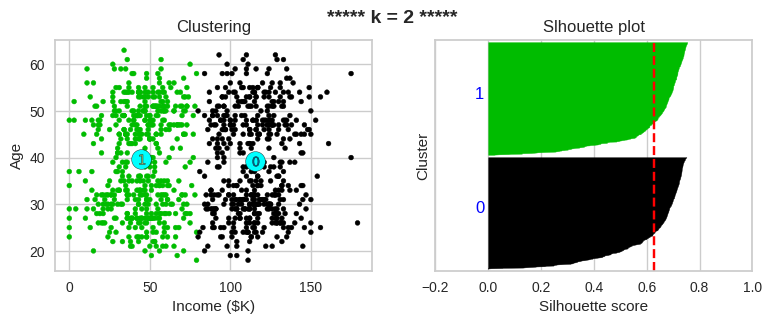

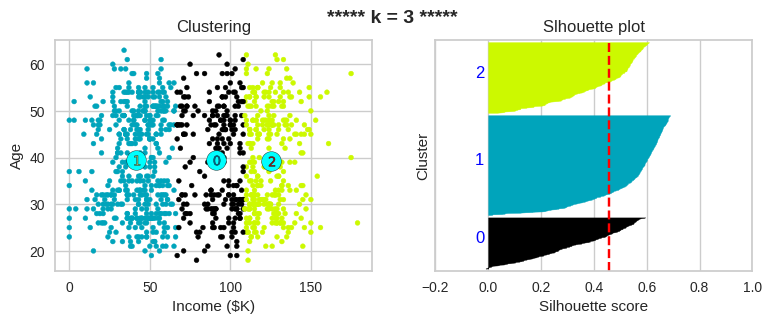

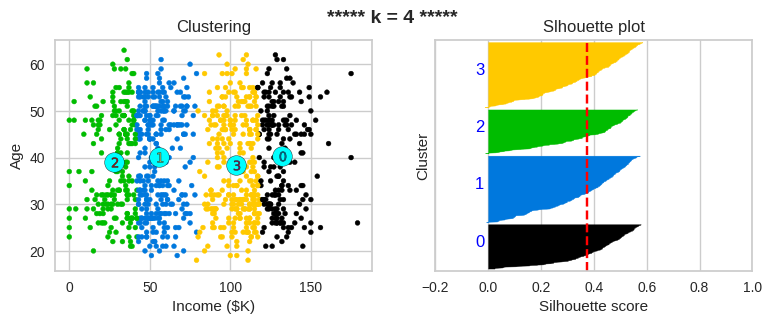

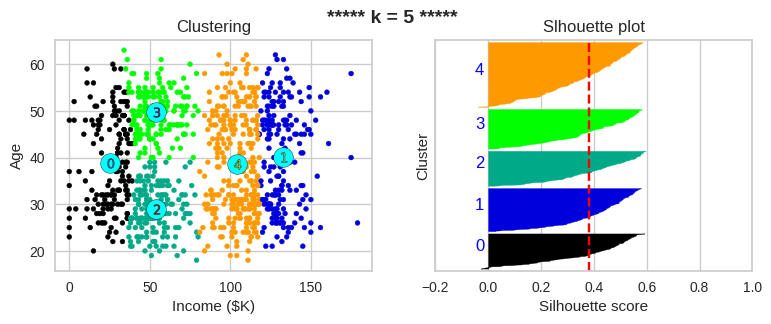

In [ ]:
## Biểu diễn trực quan clustering và phân tích silhouette scores theo tham số k
## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
nbClusters = range(2, 6)
xmin       = min(silhouettes) # kết quả nhận được từ phía trên

for k in nbClusters:
    # Thực hiện kMeans với tham số k
    model  = KMeans(n_clusters = k)
    model.fit(data)
    labels = model.fit_predict(data) # nhãn của clusters

    # Biểu diễn trực quan
    fig, (ax1, ax2) = plt.subplots(1, 2) # ax1: scatter plot; ax2: Silhouette plot
    fig.set_size_inches(9, 3)

    ax1.set_title('Clustering')
    ax1.set_xlabel('Income ($K)')
    ax1.set_ylabel('Age')
    colors = plt.cm.nipy_spectral(labels.astype(float) / k) # phổ mầu cho clusters
    ax1.scatter(data.income, data.age, marker = '.', c = colors)

    # Các trọng tâm
    centroids = model.cluster_centers_
    ax1.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'o', c = 'cyan', alpha = 1, s = 200, edgecolor = 'k')
    for i, center in enumerate(centroids):
        ax1.scatter(center[0], center[1],
                    marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

    # Silhouette trung bình cho tất cả samples
    silhouette_avg = silhouette_score(data, labels)

    # Silhouette scores cho mỗi sample (data point) xi
    silhouettes_samples = silhouette_samples(data, labels)

    # Silhouette plot
    ax2.set_xlim([xmin, 1])
    ax2.set_ylim([0, len(data) + (k + 1) * 10])
    ax2.set_title('Slhouette plot')
    ax2.set_xlabel('Silhouette score')
    ax2.set_ylabel('Cluster')

    # Vạch đứng đứt nét thể hiện Silouette trung bình
    ax2.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_yticks([])  # Xóa ticks trên trục tung

    # Vẽ silhouette scores cho từng cluster Ci
    y_lower = 10 # tung độ bắt đầu vẽ
    for Ci in range(k):
        # Silhouette scores của các samples trong cluster Ci (sắp xếp giảm dần)
        silhouette_Ci = silhouettes_samples[labels == Ci]
        silhouette_Ci.sort()

        size_Ci = silhouette_Ci.shape[0]
        y_upper = y_lower + size_Ci # tung độ kết thúc của Ci

        # Vẽ các đường ngang thể hiện silhouette scores của Ci
        color = cm.nipy_spectral(float(Ci) / k) # phổ mầu
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, silhouette_Ci,
                          facecolor = color, edgecolor = color)

        # Hiện label của cluster Ci ở phía bên trái
        ax2.text(-0.05, y_lower + 0.5 * size_Ci, str(Ci), color = 'blue')
        plt.suptitle(f'***** k = {k} *****', fontsize = 14, fontweight = 'bold')

        # Tung độ cho cluster kế tiếp
        y_lower = y_upper + 10  # 10 là độ cách

plt.show()